In [4]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [5]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation: str  
    result1: int
    result2: int

In [6]:
def addition1(state: AgentState) -> AgentState:
    """Adds number1 and number2 and stores the result in result1."""
    state['result1'] = state['number1'] + state['number2']
    return state
def addition2(state: AgentState) -> AgentState:
    """Adds number3 and number4 and stores the result in result2."""
    state['result2'] = state['number3'] + state['number4']
    return state


def subtraction1(state: AgentState) -> AgentState:
    """Subtracts number2 from number1 and stores the result in result1."""
    state['result1'] = state['number1'] - state['number2']
    return state
def subtraction2(state: AgentState) -> AgentState:
    """Subtracts number4 from number3 and stores the result in result2."""
    state['result2'] = state['number3'] - state['number4']
    return state

def decision1(state: AgentState) -> str:
    """Decides which operation to perform based on the 'operation' field."""
    if state['operation'] == '+':
        return 'add'
    elif state['operation'] == '-':
        return 'subtract'
    else:
        raise ValueError("Unsupported operation")

def decision2(state: AgentState) -> str:
    """Decides which operation to perform based on the 'operation' field."""
    if state['operation'] == '+':
        return 'add'
    elif state['operation'] == '-':
        return 'subtract'
    else:
        raise ValueError("Unsupported operation")

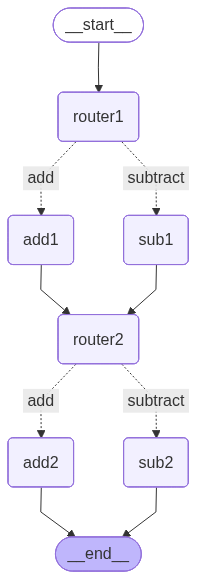

In [7]:
graph = StateGraph(AgentState)
graph.add_node("add1", addition1)
graph.add_node("add2", addition2)
graph.add_node("sub1", subtraction1)
graph.add_node("sub2", subtraction2)
graph.add_node("router1", lambda state: state)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    decision1,
    {
        'add': "add1",
        'subtract': "sub1"
    }
)

graph.add_edge("add1", "router2")
graph.add_edge("sub1", "router2")

graph.add_conditional_edges(
    "router2",
    decision2,
    {
        'add': "add2",  
        'subtract': "sub2"
    }
)

graph.add_edge("add2", END)
graph.add_edge("sub2", END)

app = graph.compile()
app 

In [10]:
app.invoke(AgentState(number1=10, number2=5, number3=20, number4=8, operation='-'))

{'number1': 10,
 'number2': 5,
 'number3': 20,
 'number4': 8,
 'operation': '-',
 'result1': 5,
 'result2': 12}